In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

#create list for the information of all the cities!!!!

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    response = requests.get(city_url).json()


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
#the code above works now we have to get this second hald to work

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bardai
Processing Record 2 of Set 1 | fort st. john
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | taksimo
Processing Record 5 of Set 1 | mbala
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | kapa'a
Processing Record 9 of Set 1 | kamaishi
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | mossel bay
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | remire-montjoly
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | udachny
Processing R

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bardai,11.6500,7.2333,16.51,28,100,5.12,NG,1736318250
1,fort st. john,56.2499,-120.8529,3.94,70,75,10.29,CA,1736318251
2,ust-nera,64.5667,143.2000,-33.89,91,100,2.02,RU,1736318252
3,taksimo,56.3444,114.8794,-21.39,94,6,0.59,RU,1736318253
4,mbala,-8.8402,31.3659,17.30,89,100,0.85,ZM,1736318254


In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
...,...,...,...,...,...,...,...,...,...
572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564
573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564
574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

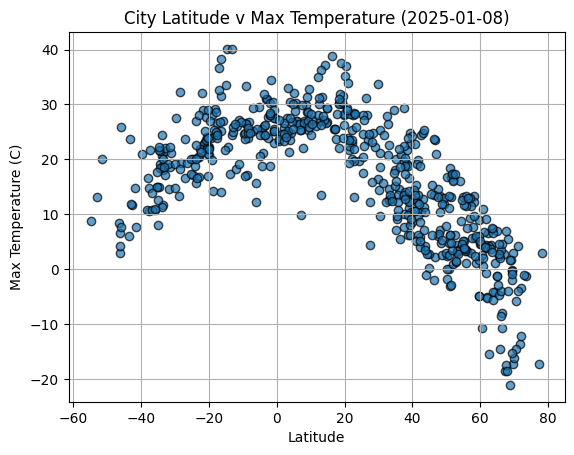

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors= 'black', alpha= 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude v Max Temperature (2025-01-08)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

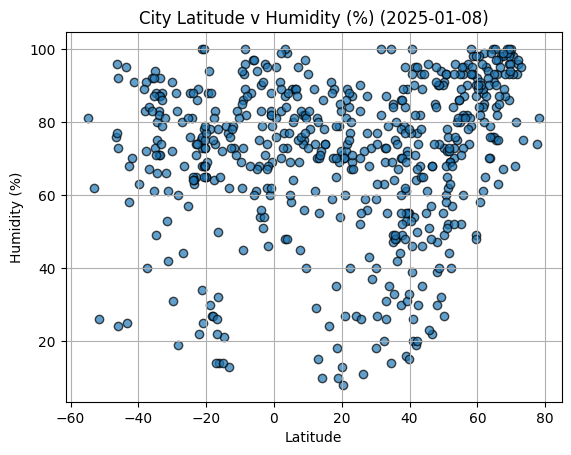

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors= 'black', alpha= 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude v Humidity (%) (2025-01-08)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

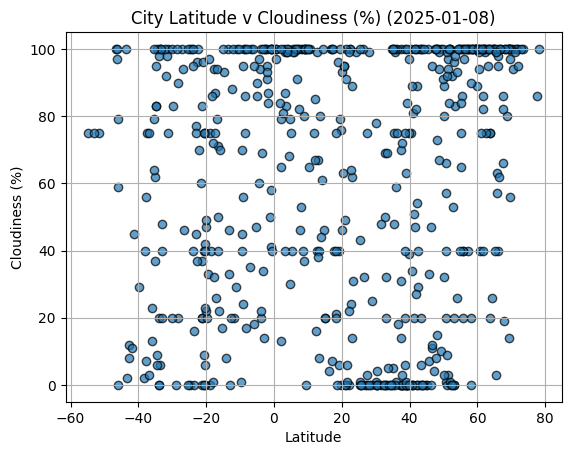

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors= 'black', alpha= 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude v Cloudiness (%) (2025-01-08)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

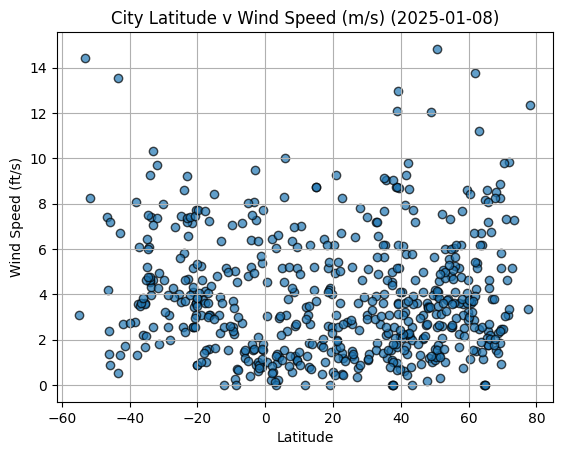

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors= 'black', alpha= 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (ft/s)')
plt.title('City Latitude v Wind Speed (m/s) (2025-01-08)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [90]:
# Define a function to create Linear Regression plots
(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = stats.linregress(city_data_df['Lat'], city_data_df['Max Temp'])
(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = stats.linregress(city_data_df['Lat'], city_data_df['Humidity'])
(slope_3, intercept_3, rvalue_3, pvalue_3, stderr_3) = stats.linregress(city_data_df['Lat'], city_data_df['Cloudiness'])
(slope_4, intercept_4, rvalue_4, pvalue_4, stderr_4) = stats.linregress(city_data_df['Lat'], city_data_df['Wind Speed'])

In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231
...,...,...,...,...,...,...,...,...,...
569,ranong,9.9658,98.6348,24.34,93,100,1.44,TH,1666108330
570,staryy nadym,65.6118,72.6842,4.57,90,99,8.05,RU,1666108561
572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965
...,...,...,...,...,...,...,...,...,...
563,ilhabela,-23.7781,-45.3581,22.67,88,95,2.32,BR,1666108558
566,nhulunbuy,-12.2333,136.7667,26.34,78,88,0.00,AU,1666108559
571,dargaville,-35.9333,173.8833,10.97,83,13,3.83,NZ,1666108563


y = -0.51x +33.71
The r^2-value is: 0.7161472181434125


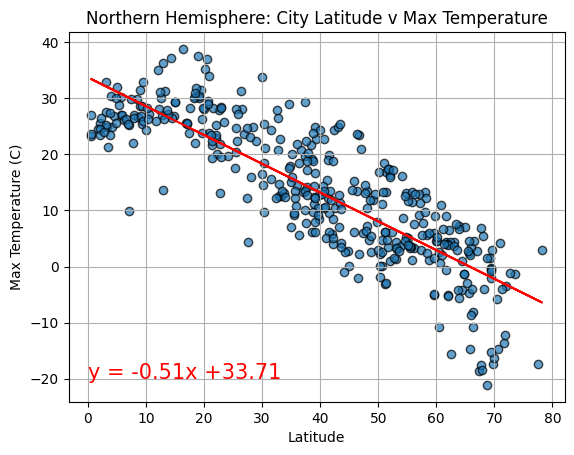

In [93]:
# Linear regression on Northern Hemisphere
(slope_north, intercept_north, rvalue_north, pvalue_north, stderr_north) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

#line equation
line_eq = "y = " + str(round(slope_north,2)) + "x +" + str(round(intercept_north,2))
print(line_eq)

#regress values
regress_values_north = northern_hemi_df['Lat'] * slope_north + intercept_north

#creating the plot and adding the labels
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors= 'black', alpha= 0.7)
plt.plot(northern_hemi_df['Lat'], regress_values_north, "r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere: City Latitude v Max Temperature')
plt.grid(True)
print(f"The r^2-value is: {rvalue_north**2}")




y = 0.33x +28.8
The r^2-value is: 0.4121057168607252


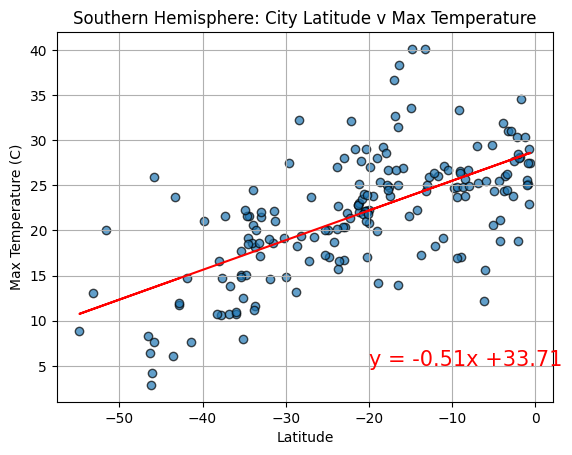

In [94]:
# Linear regression on Southern Hemisphere
(slope_south, intercept_south, rvalue_south, pvalue_south, stderr_south) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

#line equation
line_eq_south = "y = " + str(round(slope_south,2)) + "x +" + str(round(intercept_south,2))
print(line_eq_south)

#regress values
regress_values_south = southern_hemi_df['Lat'] * slope_south + intercept_south

#creating the plot and adding the labels
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors= 'black', alpha= 0.7)
plt.plot(southern_hemi_df['Lat'], regress_values_south, "r-")
plt.annotate(line_eq,(-20, 5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere: City Latitude v Max Temperature')
plt.grid(True)
print(f"The r^2-value is: {rvalue_south**2}")

**Discussion about the linear relationship:** As the latitude value gets closer to zero the higher the temperature gets while the further the latitude value gets from zero the the lower the temperature gets on both the northern and the southern hemisphere. This relationship creates a positive slope for the southern hemisphere as the latitude values are negative with the highest values being closer to 0 (there is a positive correlation between latitude values and temperatures) and it create a negative slope for the  northern hemisphere as the latitude values are positive with the highest values being further from zero (there is a negative correlation between latitude values and temperatures). The r^2 value of 0.41 in the southern hemisphere data suggest that the  model may not capture the variability well, but it is not entirely innaccurate. The r^2 value of 0.72 in the northern hemisphere suggests that the model is more accurate than that of the southern hemisphere because it is closer to one which suggest that there is less variability. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.26x +61.28


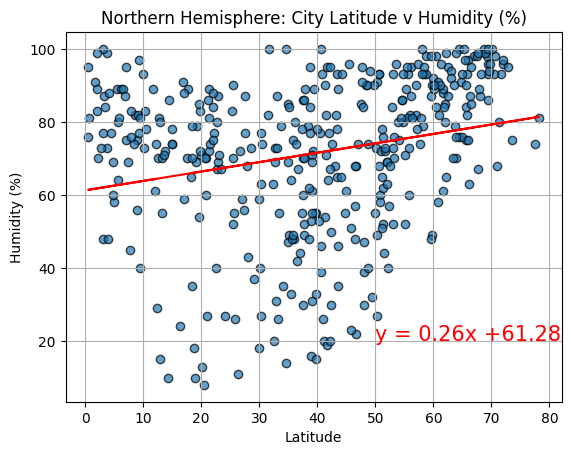

The r^2-value is: 0.05689741545789608


In [97]:
# Northern Hemisphere Humidity

# Linear regression on Northern Hemisphere
(slope_north_h, intercept_north_h, rvalue_north_h, pvalue_north_h, stderr_north_h) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])




#line equation
line_eq_north_h = "y = " + str(round(slope_north_h,2)) + "x +" + str(round(intercept_north_h,2))
print(line_eq_north_h)

#regress values
regress_values_north_h = northern_hemi_df['Lat'] * slope_north_h + intercept_north_h


# Incorporate the other graph properties
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors= 'black', alpha= 0.7)
plt.plot(northern_hemi_df['Lat'], regress_values_north_h, "r-")
plt.annotate(line_eq_north_h,(50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: City Latitude v Humidity (%)')
plt.grid(True)


# Show plot
plt.show()
#print r^2 value
print(f"The r^2-value is: {rvalue_north_h**2}")

y = 0.03x +70.73


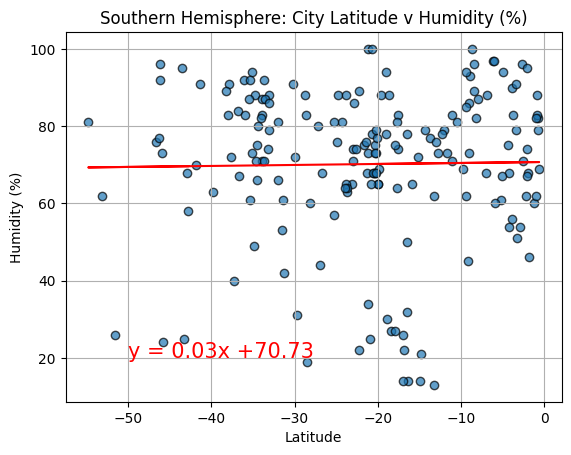

The r^2-value is: 0.0002808747046324618


In [ ]:
# Southern Hemisphere Humidity

# Linear regression on Northern Hemisphere
(slope_south_h, intercept_south_h, rvalue_south_h, pvalue_south_h, stderr_south_h) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])


#line equation
line_eq_south_h = "y = " + str(round(slope_south_h,2)) + "x +" + str(round(intercept_south_h,2))
print(line_eq_south_h)

#regress values
regress_values_south_h = southern_hemi_df['Lat'] * slope_south_h + intercept_south_h


# Incorporate the other graph properties
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors= 'black', alpha= 0.7)
plt.plot(southern_hemi_df['Lat'], regress_values_south_h, "r-")
plt.annotate(line_eq_south_h,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: City Latitude v Humidity (%)')
plt.grid(True)


# Show plot
plt.show()

#print north r^2
print(f"The r^2-value is: {rvalue_south_h**2}")

**Discussion about the linear relationship:** The r^2 values in both of these graphs for the humidities of the northern and southern hemispheres are close to zero which suggests that the model does not explain any of the variability. The points on the plot do not fit the linear regression model very well.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.31x +48.5


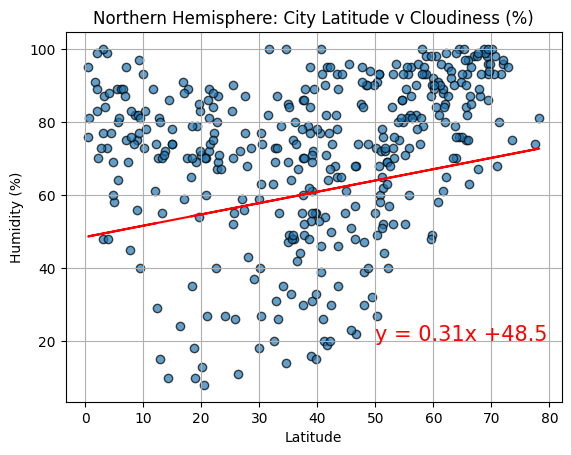

The r^2-value is: 0.024026517125811043


In [ ]:
# Northern Hemisphere Cloudiness

# Linear regression on Northern Hemisphere
(slope_north_c, intercept_north_c, rvalue_north_c, pvalue_north_c, stderr_north_c) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])




#line equation
line_eq_north_c = "y = " + str(round(slope_north_c,2)) + "x +" + str(round(intercept_north_c,2))
print(line_eq_north_c)

#regress values
regress_values_north_c = northern_hemi_df['Lat'] * slope_north_c + intercept_north_c


# Incorporate the other graph properties
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors= 'black', alpha= 0.7)
plt.plot(northern_hemi_df['Lat'], regress_values_north_c, "r-")
plt.annotate(line_eq_north_c,(50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: City Latitude v Cloudiness (%)')
plt.grid(True)


# Show plot
plt.show()
#print r^2 value
print(f"The r^2-value is: {rvalue_north_c**2}")

y = 0.39x +67.02


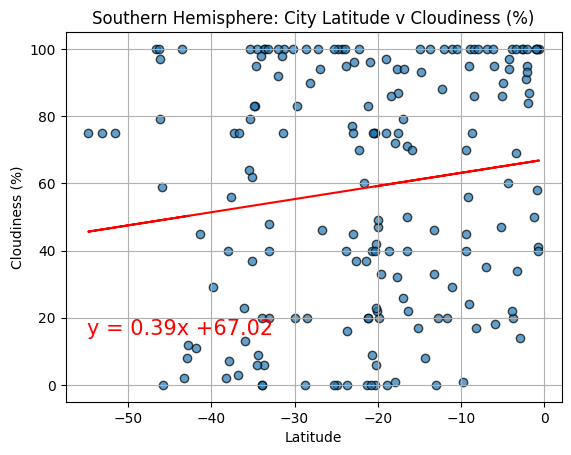

The r^2-value is: 0.020567354299943663


In [ ]:
# Southern Hemisphere Cloudiness

# Linear regression on Northern Hemisphere
(slope_south_c, intercept_south_c, rvalue_south_c, pvalue_south_c, stderr_south_c) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])


#line equation
line_eq_south_c = "y = " + str(round(slope_south_c,2)) + "x +" + str(round(intercept_south_c,2))
print(line_eq_south_c)

#regress values
regress_values_south_c = southern_hemi_df['Lat'] * slope_south_c + intercept_south_c


# Incorporate the other graph properties
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors= 'black', alpha= 0.7)
plt.plot(southern_hemi_df['Lat'], regress_values_south_c, "r-")
plt.annotate(line_eq_south_c,(-55, 15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: City Latitude v Cloudiness (%)')
plt.grid(True)


# Show plot
plt.show()

#print north r^2
print(f"The r^2-value is: {rvalue_south_c**2}")

**Discussion about the linear relationship:** The r^2 values in both of these graphs for the cloudiness of the northern and southern hemispheres are close to zero which suggests that the model does not explain any of the variability. The points on the plot do not fit the linear regression model very well.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.05x +3.14


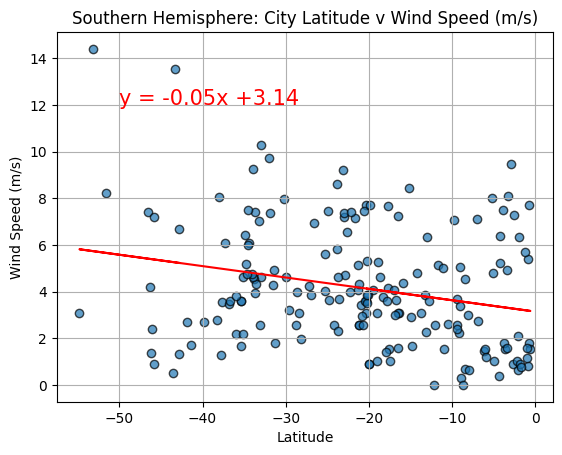

The r^2-value is: 0.06223904070051575


In [106]:
# Southern Hemisphere Wind
# Linear regression on Northern Hemisphere
(slope_south_w, intercept_south_w, rvalue_south_w, pvalue_south_w, stderr_south_w) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])


#line equation
line_eq_south_w = "y = " + str(round(slope_south_w,2)) + "x +" + str(round(intercept_south_w,2))
print(line_eq_south_w)

#regress values
regress_values_south_w = southern_hemi_df['Lat'] * slope_south_w + intercept_south_w


# Incorporate the other graph properties
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors= 'black', alpha= 0.7)
plt.plot(southern_hemi_df['Lat'], regress_values_south_w, "r-")
plt.annotate(line_eq_south_w,(-50, 12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: City Latitude v Wind Speed (m/s)')
plt.grid(True)


# Show plot
plt.show()

#print north r^2
print(f"The r^2-value is: {rvalue_south_w**2}")

y = 0.02x +2.8


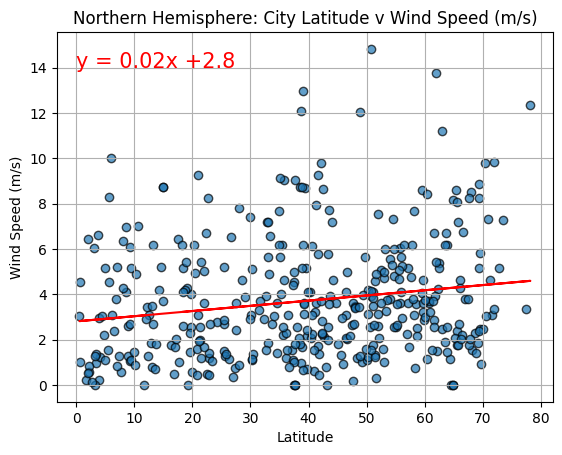

The r^2-value is: 0.030396762354449484


In [108]:
# Northern Hemisphere Wind
# Linear regression on Northern Hemisphere
(slope_north_w, intercept_north_w, rvalue_north_w, pvalue_north_w, stderr_north_w) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])


#line equation
line_eq_north_w = "y = " + str(round(slope_north_w,2)) + "x +" + str(round(intercept_north_w,2))
print(line_eq_north_w)

#regress values
regress_values_north_w = northern_hemi_df['Lat'] * slope_north_w + intercept_north_w


# Incorporate the other graph properties
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors= 'black', alpha= 0.7)
plt.plot(northern_hemi_df['Lat'], regress_values_north_w, "r-")
plt.annotate(line_eq_north_w,(0, 14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: City Latitude v Wind Speed (m/s)')
plt.grid(True)


# Show plot
plt.show()

#print north r^2
print(f"The r^2-value is: {rvalue_north_w**2}")

**Discussion about the linear relationship:** The r^2 values in both of these graphs for the wind speed (m/s) of the northern and southern hemispheres are close to zero which suggests that the model does not explain any of the variability. The points on the plot do not fit the linear regression model very well.